# Logistic function


Logistic map is written


\begin{align}
x_{n+1} = rx_n(1 - x_n)
\end{align}

where $x_n$ is a number between zero and one that represents the ratio of existing population to the maximum possible population. $r$ is a rate of growth.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Cobweb diagram

In [119]:
def draw_cobweb(f, x0=0.1, x_min=0, x_max=1, num_iters=100,
                y_min=None, y_max=None, title=None):
    plt.figure(figsize=(16, 10))
    x = np.linspace(x_min, x_max, 100)
    y = f(x)
    plt.plot(x, y, c='k')
    
    # plot bisect line
    plt.plot((x_min, x_max), (x_min, x_max), c='k')
    
    # plot spirals
    x = x0
    x_old = float('-inf')
    for i in range(num_iters):
        y = f(x)
        plt.plot((x, x), (x, y), c='r')
        plt.plot((x, y), (y, y), c='r')
        x_old = x
        x = y
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((x_min, x_max))
    if y_min is not None:
        plt.ylim((y_min, y_max))
    plt.grid(True)
    if title is not None:
        plt.title(title)

With $r$ between 1 and 2, the population will quickly approach the value $\frac{r - 1}{r}$, independent of the initial population.

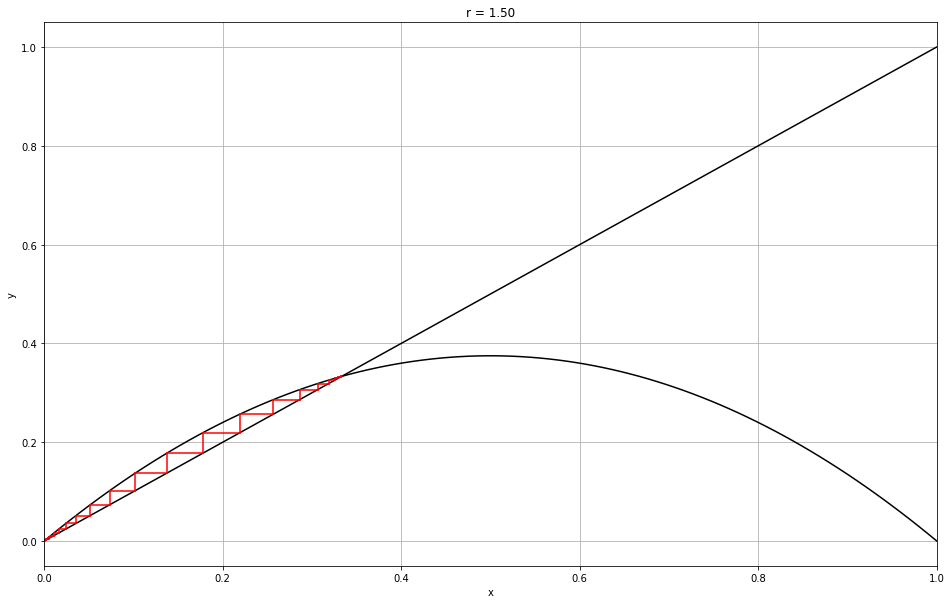

In [120]:
r = 1.5
draw_cobweb(lambda x: r*x*(1 - x), x0=1e-3, num_iters=100,
            title='r = %.2f' % r)

With $r$ between 2 and 3, the population will also eventually approach the same value $\frac{r - 1}{r}$, but first will fluctuate around that value for some time.

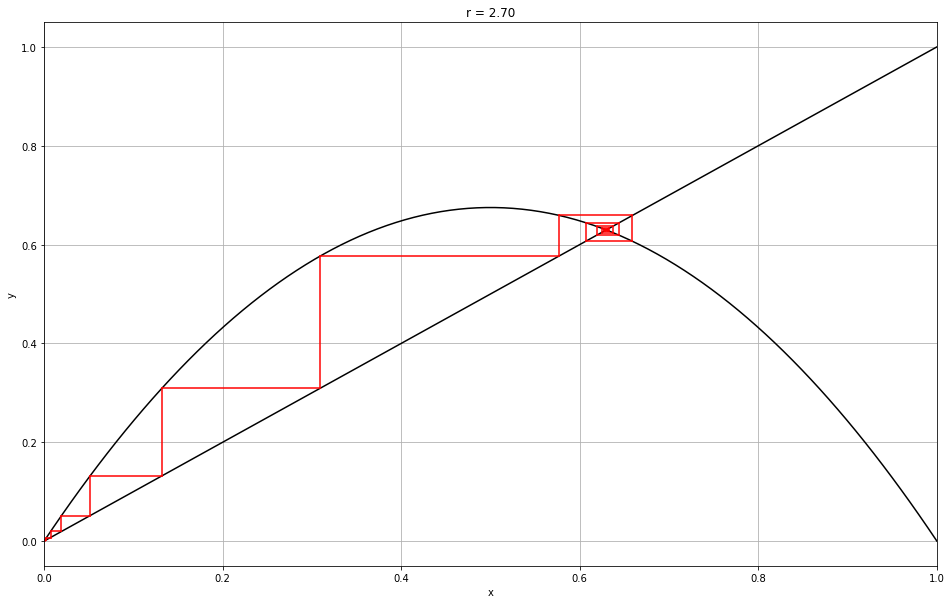

In [127]:
r = 2.7
draw_cobweb(lambda x: r*x*(1 - x), x0=1e-3, num_iters=1000,
            title='r = %.2f' % r)

With $r$ between 3 and 3.449, from almost all initial conditions the population will approach permanent oscillations between two values.

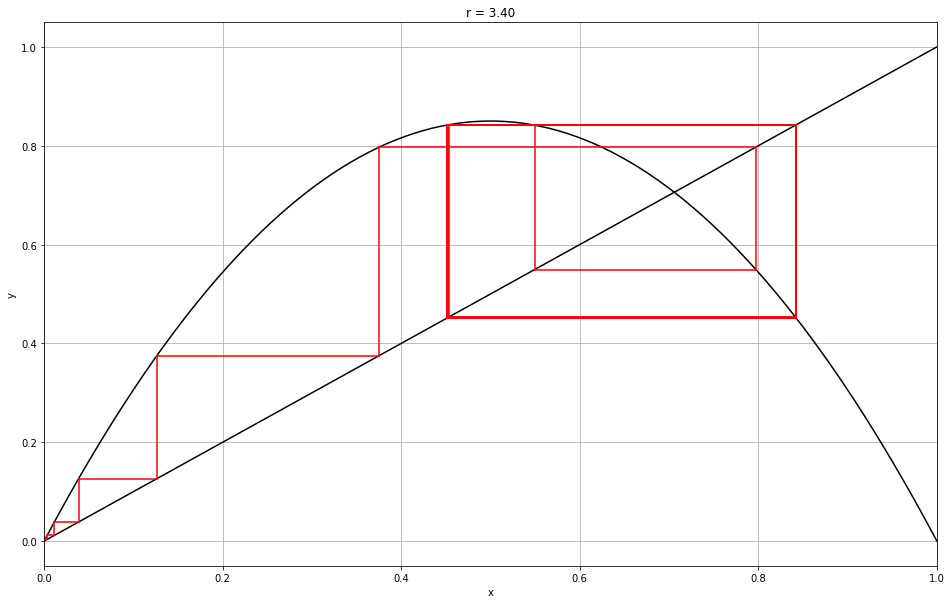

In [131]:
r = 3.4
draw_cobweb(lambda x: r*x*(1 - x), x0=1e-3, num_iters=1000,
            title='r = %.2f' % r)

With $r$ between 3.44949 and 3.54409 (approximately), from almost all initial conditions the population will approach permanent oscillations among four values.

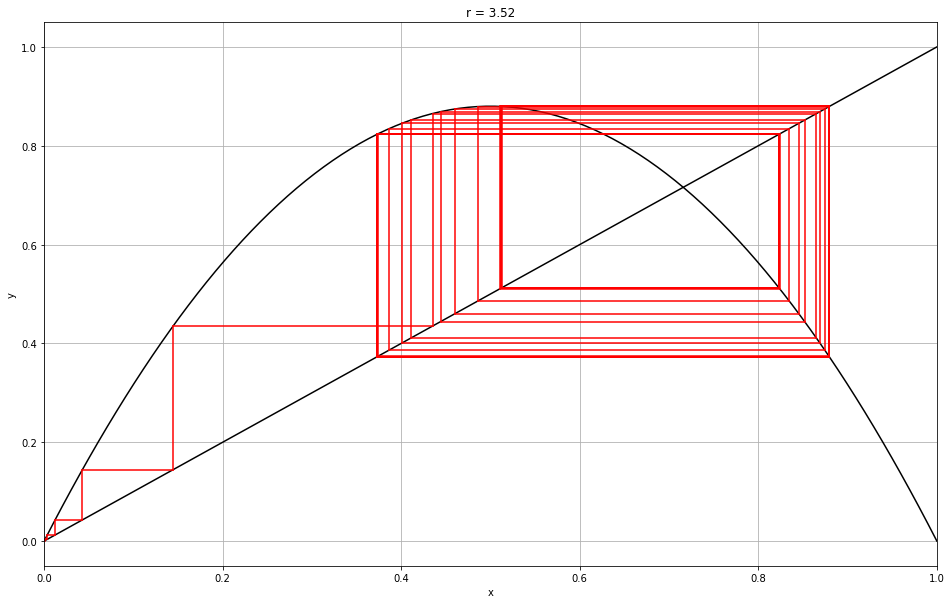

In [135]:
r = 3.52
draw_cobweb(lambda x: r*x*(1 - x), x0=1e-3,
            num_iters=1000, title='r = %.2f' % r)

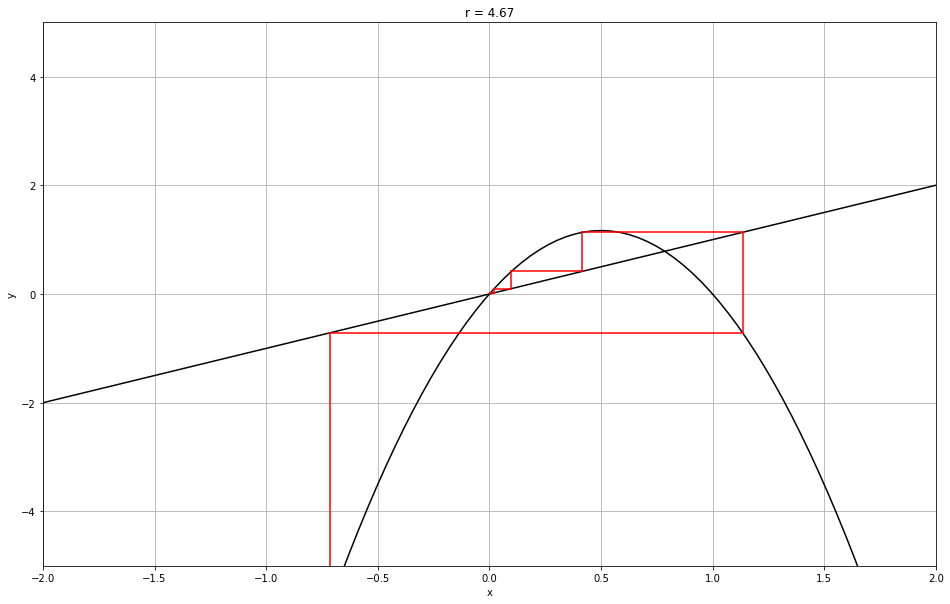

In [122]:
r = 4.669
draw_cobweb(lambda x: r*x*(1 - x), x0=1e-3, x_min=-2, x_max=2,
            y_min=-5, y_max=5, num_iters=1000, title='r = %.2f' % r)

## Logisitic function plot

In [164]:
def draw_logistic(r, num_points=100, num_iters=10):
    handles = []
    x = np.random.rand(num_points, num_iters)
    y = x
    plt.figure(figsize=(16, 10))
    for i in range(num_iters):
        y = r * y * (1 - y)
        handle = plt.scatter(x, y, s=2)
        handles.append(handle)
    plt.legend(handles, (str(i) for i in range(num_iters)),
               ncol=3, markerscale=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('r = %.2f' % r)

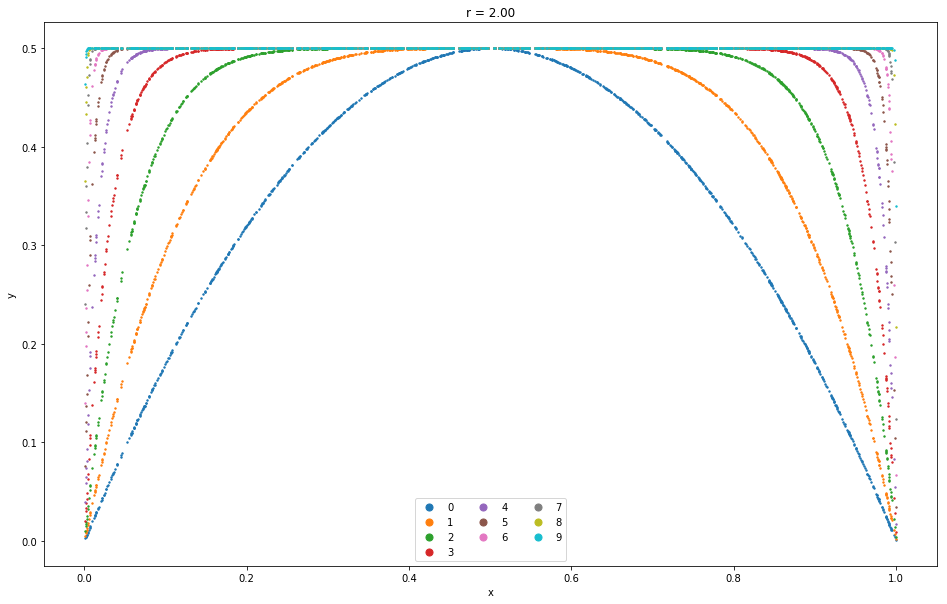

In [165]:
draw_logistic(2.0)

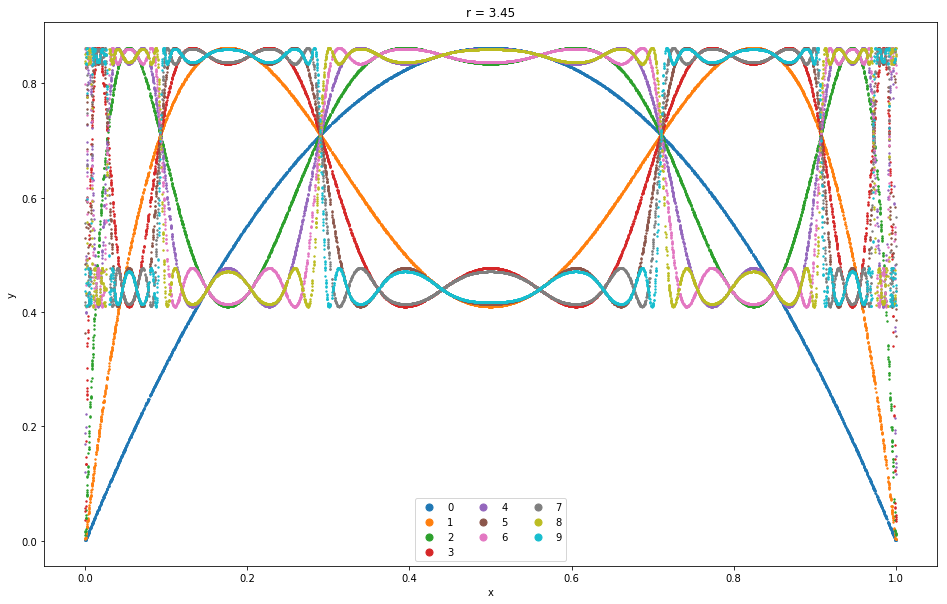

In [166]:
draw_logistic(3.449, num_points=500)

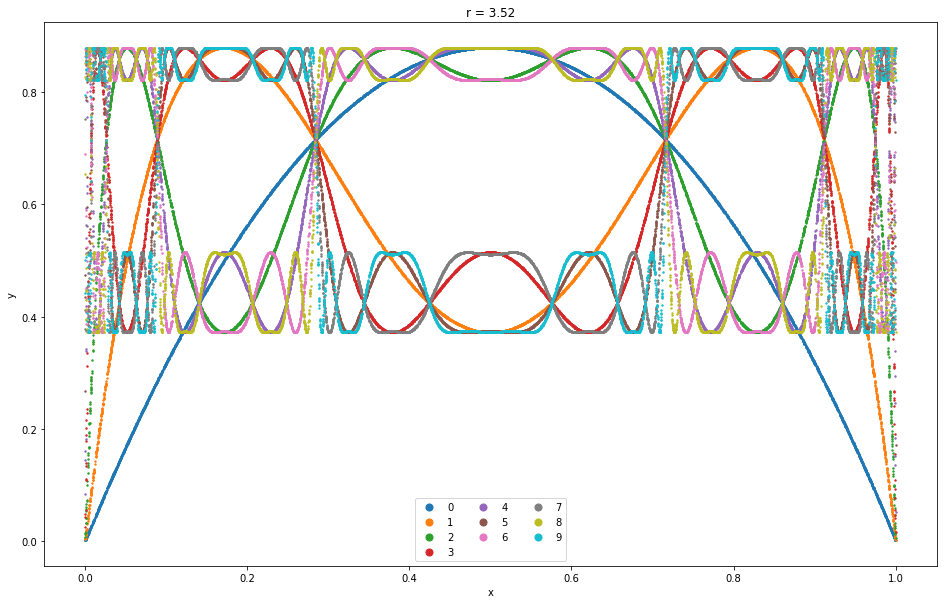

In [167]:
draw_logistic(3.52, num_points=700)

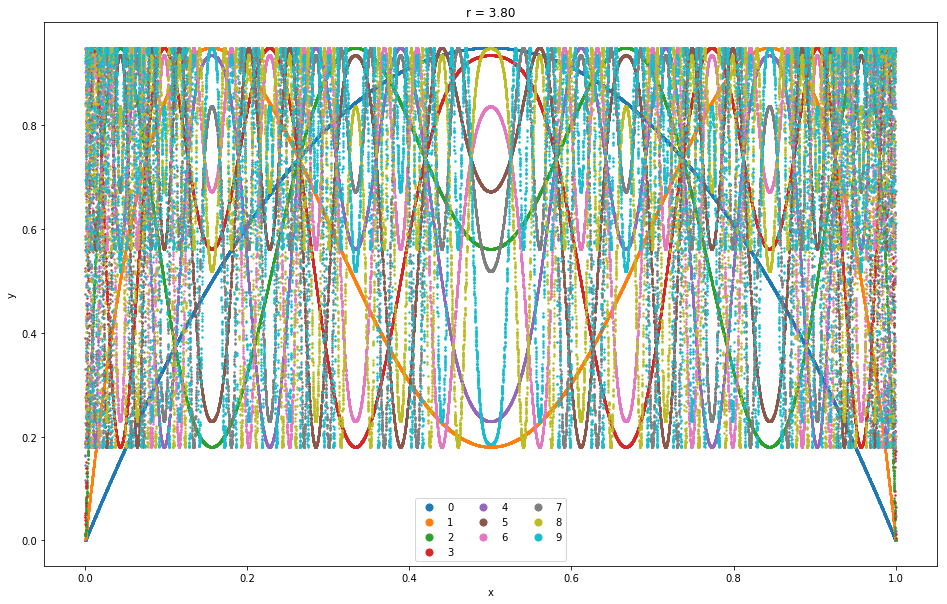

In [171]:
draw_logistic(3.8, num_points=2000)

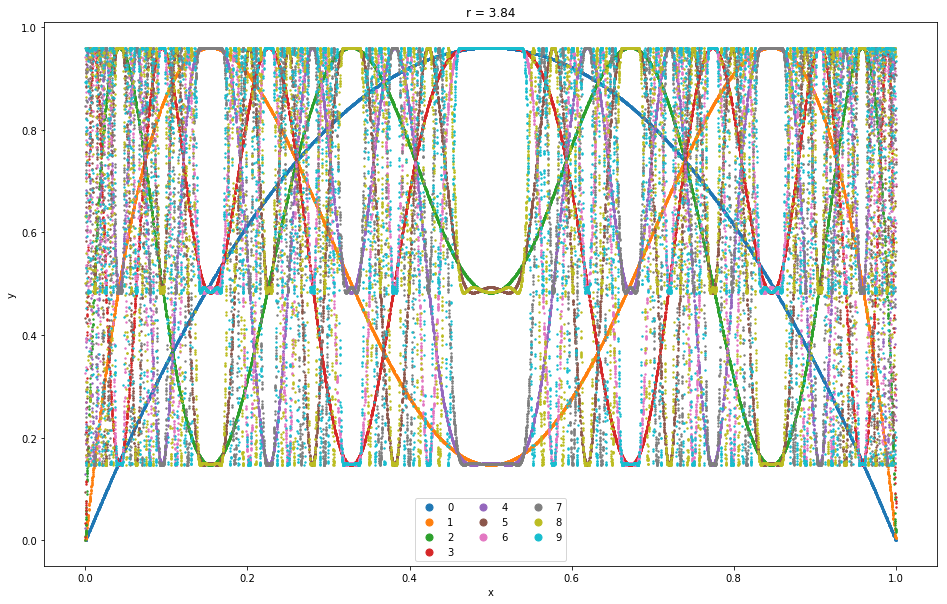

In [180]:
draw_logistic(3.84, num_points=1000)

## Bifurcation diagram

Bifurcation diagram for the logistic map. The attractor for any value of the parameter $r$ is shown on the vertical line at that $r$.

In [6]:
def draw_bifurcation(r_min=0.0, r_max=4.0, num_points=1000, num_iters=500, 
                     step=1e-3, alpha=0.017):
    yaxis = np.random.rand(num_points)
    plt.figure(figsize=(16, 6))
    for r in np.arange(r_min, r_max, step):
        y = yaxis.copy()
        for i in range(num_iters):
            y = r * y * (1 - y)
        x = [r] * num_points
        plt.scatter(x, y, s=0.1, c='k', alpha=alpha)
    plt.xlabel('r')
    plt.ylabel('x')

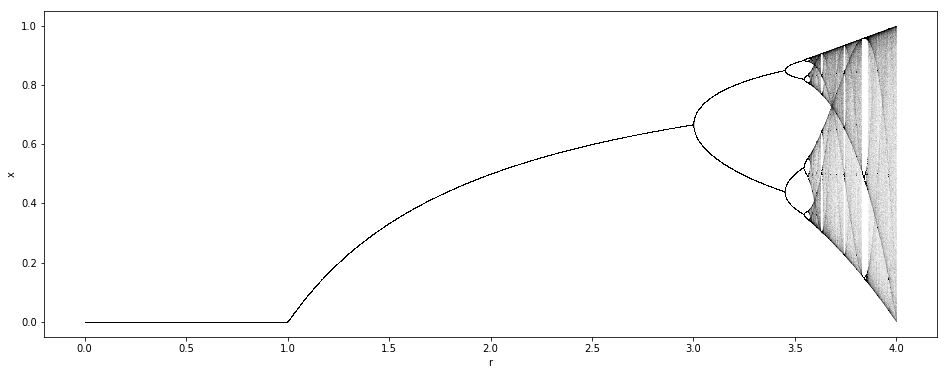

In [33]:
draw_bifurcation(alpha=0.015)

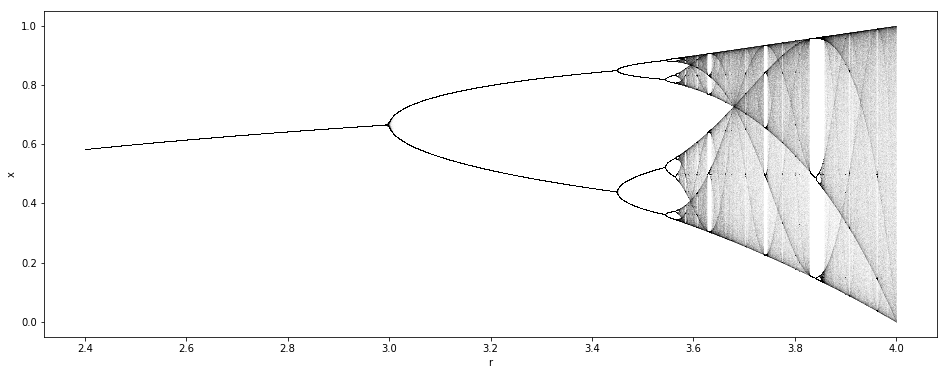

In [29]:
draw_bifurcation(r_min=2.4, step=5e-4, alpha=0.017)

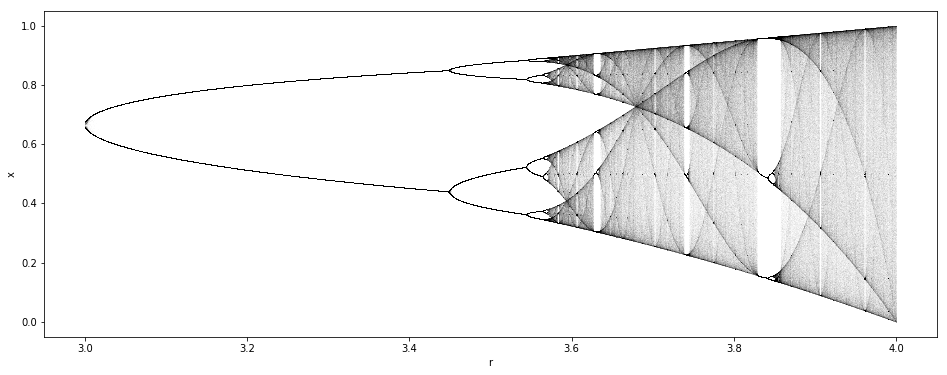

In [24]:
draw_bifurcation(r_min=3.0, step=3e-4, alpha=0.02)

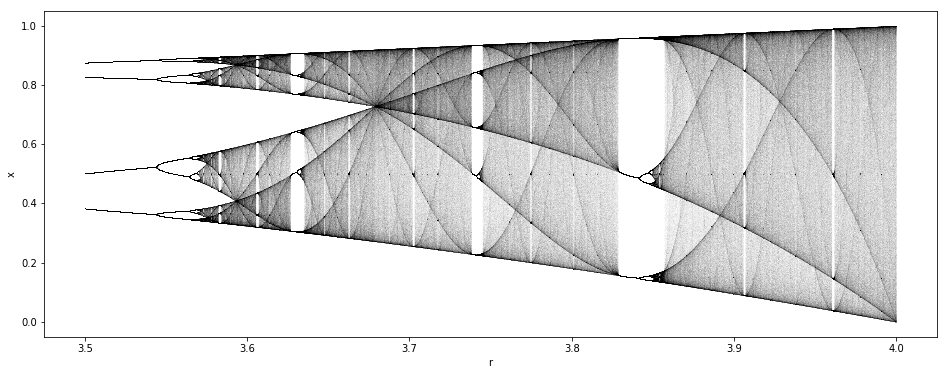

In [23]:
draw_bifurcation(r_min=3.5, step=1e-4)

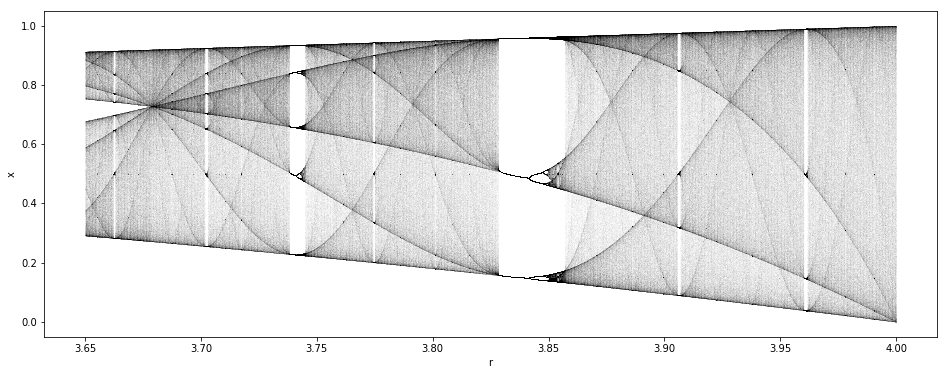

In [22]:
draw_bifurcation(r_min=3.65, step=1e-4, alpha=0.019)

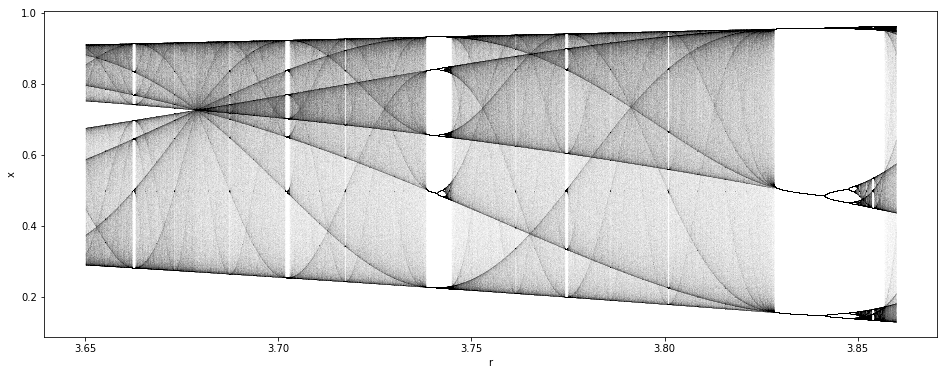

In [21]:
draw_bifurcation(r_min=3.65, r_max = 3.86, step=3e-5, alpha=0.011)

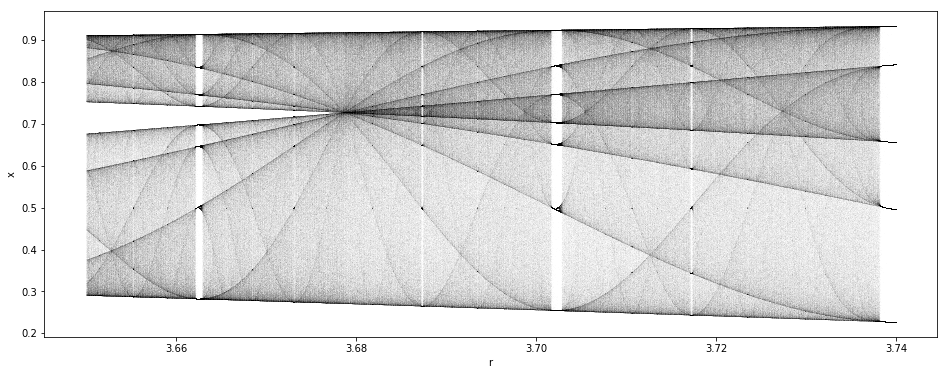

In [14]:
draw_bifurcation(r_min=3.65, r_max = 3.74, step=2e-5, alpha=0.015)

## Mandelbrot set

![Verhulst-Mandelbrot-Bifurcation](Verhulst-Mandelbrot-Bifurcation.jpg)